In [1]:
# Dependencies
%matplotlib notebook
import pandas as pd
import pathlib as path
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hvplot.pandas
import datetime as dt
import seaborn as sns
import yfinance as yf
from config import api_key
from pprint import pprint
from sklearn.linear_model import LinearRegression
import certifi
import json

In [2]:
# import data for Dollarama, Canadian_tire, and Linamar companies.

Dollarama_balance_sheet=pd.read_csv("Resource/Dollarama_balance_sheet.csv")
Dollarama_income_statement = pd.read_csv("Resource/Dollarama_income_tatement.csv")
Dollarama_cash_flow_statement = pd.read_csv("Resource/Dollarama_cash_flow_statement.csv")

Canadian_tire_balance_sheet = pd.read_csv("Resource/Canadian_tire_balance_sheet.csv")
Canadian_tire_income_statement = pd.read_csv("Resource/Canadian_tire_income_statement.csv")
Canadian_tire_cash_flow_statement = pd.read_csv("Resource/Canadian_tire_cash_flow_statement.csv")

Linamar_balance_sheet = pd.read_csv("Resource/Linamar_balance_sheet.csv")
Linamar_income_statement = pd.read_csv("Resource/Linamar_income_statement.csv")
Linamar_cash_flow_statement = pd.read_csv("Resource/Linamar_cash_flow_statement.csv")


In [3]:
# print the data frame for linamar as a sample from the data
Linamar_cash_flow_statement.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Linamar Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash Flow Statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the data

In [4]:
# Rename the columns.
Dollarama_balance_sheet=Dollarama_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_income_statement = Dollarama_income_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})


Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.rename(columns=        
         { "Canadian Tire Corporation Limited": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_income_statement = Canadian_tire_income_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_balance_sheet = Linamar_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_income_statement = Linamar_income_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_cash_flow_statement = Linamar_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

In [5]:
# Clean data for Dollarama
Dollarama_balance_sheet = Dollarama_balance_sheet.loc[Dollarama_balance_sheet["Dollarama"] != 'Period End Date']
Dollarama_balance_sheet = Dollarama_balance_sheet.dropna(how='any')
Dollarama_balance_sheet = Dollarama_balance_sheet.set_index("Dollarama")


Dollarama_income_statement = Dollarama_income_statement.loc[Dollarama_income_statement["Dollarama"] != 'Period End Date']
Dollarama_income_statement = Dollarama_income_statement.dropna(how='any')
Dollarama_income_statement = Dollarama_income_statement.set_index("Dollarama")


Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.loc[Dollarama_cash_flow_statement["Dollarama"] != 'Period End Date']
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.dropna(how='any')
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.set_index("Dollarama")


# Clean data for Canadian_tire
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.loc[Canadian_tire_balance_sheet["Canadian Tire"] != 'Period End Date']
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.dropna(how='any')
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.set_index("Canadian Tire")


Canadian_tire_income_statement = Canadian_tire_income_statement.loc[Canadian_tire_income_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_income_statement = Canadian_tire_income_statement.dropna(how='any')
Canadian_tire_income_statement = Canadian_tire_income_statement.set_index("Canadian Tire")



Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.loc[Canadian_tire_cash_flow_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.dropna(how='any')
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.set_index("Canadian Tire")



# Clean data for Canadian_tire
Linamar_balance_sheet = Linamar_balance_sheet.loc[Linamar_balance_sheet["Linamar"] != 'Period End Date']
Linamar_balance_sheet = Linamar_balance_sheet.dropna(how='any')
Linamar_balance_sheet = Linamar_balance_sheet.set_index("Linamar")


Linamar_income_statement = Linamar_income_statement.loc[Linamar_income_statement["Linamar"] != 'Period End Date']
Linamar_income_statement = Linamar_income_statement.dropna(how='any')
Linamar_income_statement = Linamar_income_statement.set_index("Linamar")


Linamar_cash_flow_statement = Linamar_cash_flow_statement.loc[Linamar_cash_flow_statement["Linamar"] != 'Period End Date']
Linamar_cash_flow_statement = Linamar_cash_flow_statement.dropna(how='any')
Linamar_cash_flow_statement = Linamar_cash_flow_statement.set_index("Linamar")


In [6]:
# Convert rows to columns and vice versa

Dollarama_balance_sheet_df = Dollarama_balance_sheet.transpose()
Dollarama_income_statement_df = Dollarama_income_statement.transpose()
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement.transpose()

Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet.transpose()
Canadian_tire_income_statement_df = Canadian_tire_income_statement.transpose()
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement.transpose()

Linamar_balance_sheet_df = Linamar_balance_sheet.transpose()
Linamar_income_statement_df = Linamar_income_statement.transpose()
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement.transpose()

In [7]:
# To convert colomns to float type in balance sheet
for col in Dollarama_balance_sheet_df.columns:
    Dollarama_balance_sheet_df[str(col)] = Dollarama_balance_sheet_df[str(col)].str.replace(",", "").astype(float)
    
for col in Canadian_tire_balance_sheet_df.columns:
    Canadian_tire_balance_sheet_df[str(col)] = Canadian_tire_balance_sheet_df[str(col)].str.replace(",", "").astype(float)

for col in Linamar_balance_sheet_df.columns:
    Linamar_balance_sheet_df[str(col)] = Linamar_balance_sheet_df[str(col)].str.replace(",", "").astype(float)

In [8]:
# To replace % to "" in balance sheet before convert columns to float type
Dollarama_income_statement_df['Gross Profit Margin'] = Dollarama_income_statement_df['Gross Profit Margin'].str.replace("%", "")
Dollarama_income_statement_df['Revenue Growth (YoY)'] = Dollarama_income_statement_df['Revenue Growth (YoY)'].str.replace("%", "")

Canadian_tire_income_statement_df['Gross Profit Margin'] = Canadian_tire_income_statement_df['Gross Profit Margin'].str.replace("%", "")
Canadian_tire_income_statement_df['Revenue Growth (YoY)'] = Canadian_tire_income_statement_df['Revenue Growth (YoY)'].str.replace("%", "")

Linamar_income_statement_df['Gross Profit Margin'] = Linamar_income_statement_df['Gross Profit Margin'].str.replace("%", "")
Linamar_income_statement_df['Revenue Growth (YoY)'] = Linamar_income_statement_df['Revenue Growth (YoY)'].str.replace("%", "")

In [9]:
# print the data frame after cleaning
Dollarama_income_statement_df

Dollarama,Revenue,Revenue Growth (YoY),Cost of Revenues,Gross Profit,Gross Profit Margin,R&D Expenses,"Selling, General & Admin Expenses",Other Inc / (Exp),Operating Expenses,Operating Income,...,Net Income to Common Excl Extra Items,Basic EPS (Cont. Ops),Diluted EPS (Cont. Ops),Weighted Average Basic Shares Out.,Weighted Average Diluted Shares Out.,EBITDA,EBIT,Revenue (Reported),Operating Income (Reported),Operating Income (Adjusted)
2014,"2,064.676",11.1,"-1,094.949",969.727,47.0,0,-567.325,-47.898,-615.223,354.504,...,250.094,0.58,0.58,431.028,432.276,399.007,354.504,"2,064.676",354.504,354.504
2015,"2,330.805",12.9,"-1,242.857","1,087.948",46.7,0,-627.078,-38.309,-665.387,422.561,...,295.41,0.74,0.74,400.014,401.868,455.276,422.561,"2,330.805",422.561,422.561
2016,"2,650.327",13.7,"-1,361.125","1,289.202",48.6,0,-691.742,-48.085,-739.827,549.375,...,385.146,1.01,1,381.813,385.26,589.703,549.375,"2,650.327",549.375,549.375
2017,"2,963.219",11.8,"-1,523.272","1,439.947",48.6,0,-736.689,-57.748,-794.437,645.51,...,445.636,1.25,1.24,356.994,360.729,693.718,645.51,"2,963.219",645.51,645.51
2018,"3,266.09",10.2,"-1,665.771","1,600.319",49.0,0,-774.207,-70.55,-844.757,755.562,...,519.41,1.54,1.52,338.253,342.519,813.48,755.562,"3,266.09",755.562,755.562
2019,"3,548.503",8.6,"-1,838.076","1,710.427",48.2,0,-631.86,-233.378,-865.238,845.189,...,544.986,1.68,1.66,324.46,328.404,909.801,845.189,"3,548.503",845.189,845.189
2020,"3,787.291",6.7,"-2,001.917","1,785.374",47.1,0,-684.715,-229.687,-914.402,870.972,...,564.039,1.8,1.78,313.91,317.185,919.448,857.874,"3,787.291",868.137,857.874
2021,"4,026.259",6.3,"-2,114.633","1,911.626",47.5,0,-716.647,-426.952,"-1,143.599",768.027,...,564.348,1.82,1.81,310.738,312.455,999.302,925.346,"4,026.259",861,925.346
2022,"4,330.761",7.6,"-2,281.794","2,048.967",47.3,0,-799.574,-353.676,"-1,153.25",895.717,...,663.169,2.19,2.18,302.963,304.416,"1,035.084",951.433,"4,330.761",984.617,951.433
2023,"5,052.741",16.7,"-2,701.788","2,350.953",46.5,0,-873.059,-399.038,"-1,272.097","1,078.856",...,801.863,2.77,2.76,289.412,291.005,"1,239.058","1,146.102","5,052.741","1,191.501","1,146.102"


In [10]:
# To convert colomns to float type in income_statement
for col in Dollarama_income_statement_df.columns:
    Dollarama_income_statement_df[str(col)] = Dollarama_income_statement_df[str(col)].str.replace(",", "").astype(float)
    
for col in Canadian_tire_income_statement_df.columns:
    Canadian_tire_income_statement_df[str(col)] = Canadian_tire_income_statement_df[str(col)].str.replace(",", "").astype(float)
 
    
for col in Linamar_income_statement_df.columns:
    Linamar_income_statement_df[str(col)] = Linamar_income_statement_df[str(col)].str.replace(",", "").astype(float)

In [11]:
# To convert colomns to float type in cash_flow_statement
for col in Dollarama_cash_flow_statement_df.columns:
    Dollarama_cash_flow_statement_df[str(col)] = Dollarama_cash_flow_statement_df[str(col)].str.replace(",", "").astype(float)
    
for col in Canadian_tire_cash_flow_statement_df.columns:
    Canadian_tire_cash_flow_statement_df[str(col)] = Canadian_tire_cash_flow_statement_df[str(col)].str.replace(",", "").astype(float)
 
    
for col in Linamar_cash_flow_statement_df.columns:
    Linamar_cash_flow_statement_df[str(col)] = Linamar_cash_flow_statement_df[str(col)].str.replace(",", "").astype(float)

In [12]:
# creat DataFrame for Dollarama:
columns = ["Ticker", "Working capital ratio", "Quick Ratio", "Operating cash flow ratio", "Debt to equity ratio", "Cash flow to debt ratio",
          "Interest coverage ratio", "Gross Progit Margin", "Net profit margin", "Return On Equity (ROE)", "EPS",
          "Inventory turnover ratio", "Working capital turnover ratio", "Asset Turnover Ratio" ]

Dollarama_ratios_df = pd.DataFrame(columns=columns)
Dollarama_ratios_df

,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio


In [13]:
# creat DataFrame for Dollarama:
columns = ["Ticker", "Working capital ratio", "Quick Ratio", "Operating cash flow ratio", "Debt to equity ratio", "Cash flow to debt ratio",
          "Interest coverage ratio", "Gross Progit Margin", "Net profit margin", "Return On Equity (ROE)", "EPS",
          "Inventory turnover ratio", "Working capital turnover ratio", "Asset Turnover Ratio" ]

Canadian_tire_ratios_df = pd.DataFrame(columns=columns)
Canadian_tire_ratios_df

,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio


In [14]:
# creat DataFrame for Dollarama:
columns = ["Ticker", "Working capital ratio", "Quick Ratio", "Operating cash flow ratio", "Debt to equity ratio", "Cash flow to debt ratio",
          "Interest coverage ratio", "Gross Progit Margin", "Net profit margin", "Return On Equity (ROE)", "EPS",
          "Inventory turnover ratio", "Working capital turnover ratio", "Asset Turnover Ratio" ]

Linamar_ratios_df = pd.DataFrame(columns=columns)
Linamar_ratios_df

,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio


# Calculating the financial ratios

In [15]:
# Liquidity Ratios
# 1-Working capital ratio = Current assets / Current liabilities
Dollarama_ratios_df["Working capital ratio"] = Dollarama_balance_sheet_df["Total Current Assets"] / Dollarama_balance_sheet_df["Total Current Liabilities"]
Canadian_tire_ratios_df["Working capital ratio"] = Canadian_tire_balance_sheet_df["Total Current Assets"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]
Linamar_ratios_df["Working capital ratio"] = Linamar_balance_sheet_df["Total Current Assets"] / Linamar_balance_sheet_df["Total Current Liabilities"]

# 2-Quick Ratio = Current assets – (Inventories / Current liabilities)
Dollarama_ratios_df["Quick Ratio"] = (Dollarama_balance_sheet_df['Inventory'] - (Dollarama_balance_sheet_df["Inventory"] / Dollarama_balance_sheet_df["Total Current Liabilities"]))
Canadian_tire_ratios_df["Quick Ratio"] = (Canadian_tire_balance_sheet_df['Inventory'] - (Canadian_tire_balance_sheet_df["Inventory"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]))
Linamar_ratios_df["Quick Ratio"] = (Linamar_balance_sheet_df['Inventory'] - (Linamar_balance_sheet_df["Inventory"] / Linamar_balance_sheet_df["Total Current Liabilities"]))

# 3-Operating cash flow ratio = Operating cash flow / Current liabilities
Dollarama_ratios_df["Operating cash flow ratio"] = Dollarama_cash_flow_statement_df["Cash from Operations"] / Dollarama_balance_sheet_df["Total Current Liabilities"]
Canadian_tire_ratios_df["Operating cash flow ratio"] = Canadian_tire_cash_flow_statement_df["Cash from Operations"] / Canadian_tire_balance_sheet_df["Total Current Liabilities"]
Linamar_ratios_df["Operating cash flow ratio"] = Linamar_cash_flow_statement_df["Cash from Operations"] / Linamar_balance_sheet_df["Total Current Liabilities"]


In [16]:
# Risk Analysis Ratios
# 1-Debt to equity ratio = Total liabilities / Shareholder’s equity
Dollarama_ratios_df["Debt to equity ratio"] = Dollarama_balance_sheet_df["Total Current Liabilities"] / Dollarama_balance_sheet_df["Total Equity"]
Canadian_tire_ratios_df["Debt to equity ratio"] = Canadian_tire_balance_sheet_df["Total Current Liabilities"] / Canadian_tire_balance_sheet_df["Total Equity"]
Linamar_ratios_df["Debt to equity ratio"] = Linamar_balance_sheet_df["Total Current Liabilities"] / Linamar_balance_sheet_df["Total Equity"]

# 2-Cash flow to debt ratio = (Operating Cash Flow / Total Debt) * 100
Dollarama_ratios_df["Cash flow to debt ratio"] = (Dollarama_cash_flow_statement_df["Cash from Operations"] / Dollarama_balance_sheet_df["Total Liabilities"])*100
Canadian_tire_ratios_df["Cash flow to debt ratio"] = (Canadian_tire_cash_flow_statement_df["Cash from Operations"] / Canadian_tire_balance_sheet_df["Total Liabilities"])*100
Linamar_ratios_df["Cash flow to debt ratio"] = (Linamar_cash_flow_statement_df["Cash from Operations"] / Linamar_balance_sheet_df["Total Liabilities"])*100

# 3-Interest coverage ratio = Operating income / Interest expenses
Dollarama_ratios_df["Interest coverage ratio"] = Dollarama_income_statement_df ["Operating Income"] / - Dollarama_income_statement_df["Net Interest Expenses"]
Canadian_tire_ratios_df["Interest coverage ratio"] = Canadian_tire_income_statement_df ["Operating Income"] / - Canadian_tire_income_statement_df["Net Interest Expenses"]
Linamar_ratios_df["Interest coverage ratio"] = Linamar_income_statement_df ["Operating Income"] / - Linamar_income_statement_df["Net Interest Expenses"]


In [17]:
# Profitability Ratios
# 1-Gross Progit Margin = (Revenue - Cost of sale / Revenue) * 100
Dollarama_ratios_df["Gross Progit Margin"] = ((Dollarama_income_statement_df["Revenue"] + Dollarama_income_statement_df["Cost of Revenues"]) / Dollarama_income_statement_df["Revenue"])*100
Canadian_tire_ratios_df["Gross Progit Margin"] = ((Canadian_tire_income_statement_df["Revenue"] + Canadian_tire_income_statement_df["Cost of Revenues"]) / Canadian_tire_income_statement_df["Revenue"])*100
Linamar_ratios_df["Gross Progit Margin"] = ((Linamar_income_statement_df["Revenue"] + Linamar_income_statement_df["Cost of Revenues"]) / Linamar_income_statement_df["Revenue"])*100

# 2-Net profit margin = Net income / Sales
Dollarama_ratios_df["Net profit margin"] = Dollarama_income_statement_df["Net Income to Stockholders"] / Dollarama_income_statement_df["Revenue"]
Canadian_tire_ratios_df["Net profit margin"] = Canadian_tire_income_statement_df["Net Income to Stockholders"] / Canadian_tire_income_statement_df["Revenue"]
Linamar_ratios_df["Net profit margin"] = Linamar_income_statement_df["Net Income to Stockholders"] / Linamar_income_statement_df["Revenue"]

# 3-Return On Equity (ROE) = Net income / Shareholder’s equity
Dollarama_ratios_df["Return On Equity (ROE)"] = Dollarama_income_statement_df["Net Income to Stockholders"] / Dollarama_balance_sheet_df["Total Equity"]
Canadian_tire_ratios_df["Return On Equity (ROE)"] = Canadian_tire_income_statement_df["Net Income to Stockholders"] / Canadian_tire_balance_sheet_df["Total Equity"]
Linamar_ratios_df["Return On Equity (ROE)"] = Linamar_income_statement_df["Net Income to Stockholders"] / Linamar_balance_sheet_df["Total Equity"]

# 4-EPS = (Net income - Preferred dividends) / Average common shares outstanding
Dollarama_ratios_df["EPS"] = Dollarama_income_statement_df["Basic EPS (Cont. Ops)"]
Canadian_tire_ratios_df["EPS"] = Canadian_tire_income_statement_df["Basic EPS (Cont. Ops)"]
Linamar_ratios_df["EPS"] = Linamar_income_statement_df["Basic EPS (Cont. Ops)"]


In [18]:
# Efficiency Ratios
# 1-Inventory turnover ratio = Cost of goods / Average inventory
Dollarama_ratios_df['Inventory_Turnover_Ratio'] = Dollarama_income_statement_df['Cost of Revenues'] / Dollarama_balance_sheet_df['Inventory']
Canadian_tire_ratios_df['Inventory_Turnover_Ratio'] = Canadian_tire_income_statement_df['Cost of Revenues'] / Canadian_tire_balance_sheet_df['Inventory']
Linamar_ratios_df['Inventory_Turnover_Ratio'] = Linamar_income_statement_df['Cost of Revenues'] / Linamar_balance_sheet_df['Inventory']

# 2-Working capital turnover ratio = Net Sales / Average Working Capital
Dollarama_ratios_df['Working capital turnover ratio'] = (Dollarama_income_statement_df["Revenue"] / (Dollarama_balance_sheet_df["Total Current Assets"] - Dollarama_balance_sheet_df["Total Current Liabilities"]))
Canadian_tire_ratios_df['Working capital turnover ratio'] = (Canadian_tire_income_statement_df["Revenue"] / (Canadian_tire_balance_sheet_df["Total Current Assets"] - Canadian_tire_balance_sheet_df["Total Current Liabilities"]))
Linamar_ratios_df['Working capital turnover ratio'] = (Linamar_income_statement_df["Revenue"] / (Linamar_balance_sheet_df["Total Current Assets"] - Linamar_balance_sheet_df["Total Current Liabilities"]))


# 3-Asset Turnover Ratio = Net Sales / Total Assets
Dollarama_ratios_df ["Asset Turnover Ratio"] = Dollarama_income_statement_df["Revenue"] / Dollarama_balance_sheet_df["Total Assets"]
Canadian_tire_ratios_df ["Asset Turnover Ratio"] = Canadian_tire_income_statement_df["Revenue"] / Canadian_tire_balance_sheet_df["Total Assets"]
Linamar_ratios_df["Asset Turnover Ratio"] = Linamar_income_statement_df["Revenue"] / Linamar_balance_sheet_df["Total Assets"]


In [19]:
# Creat a data frame for the ratios result for Dollarama
Dollarama_ratios_df["Ticker"] = "DOL"
Dollarama_ratios_df = Dollarama_ratios_df.drop(Dollarama_ratios_df.index[9]).reset_index(drop=False)
Dollarama_ratios_df

,index,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio,Inventory_Turnover_Ratio
0,2014,DOL,2.801910,362.453613,1.882661,0.189546,43.890102,30.369571,46.967515,0.121130,0.289405,0.58,NaN,6.995321,1.317783,-3.002493
1,2015,DOL,2.544633,407.021394,1.651439,0.291017,37.056181,21.174634,46.676921,0.126742,0.398944,0.74,NaN,7.002442,1.370386,-3.039372
2,2016,DOL,2.717455,468.123894,1.978791,0.486291,33.350383,25.677728,48.643130,0.145320,0.824985,1.01,NaN,6.797331,1.461142,-2.894810
3,2017,DOL,1.088942,464.807884,0.983962,5.119481,28.651171,19.511834,48.594012,0.150389,4.443740,1.25,NaN,64.893218,1.590178,-3.270824
4,2018,DOL,0.790586,490.246051,0.884026,-2.856834,29.145968,18.947313,48.998007,0.159031,-2.058227,1.54,NaN,-21.633173,1.688479,-3.393113
5,2019,DOL,1.553401,579.929636,1.547611,-1.396523,18.654994,8.934628,48.201368,0.153582,-1.717119,1.68,NaN,14.466798,1.056206,-3.162330
6,2020,DOL,0.699779,622.919291,0.670498,-11.849581,19.232736,8.657343,47.141189,0.148929,-6.117825,1.80,NaN,-11.547077,1.019060,-3.210825
7,2021,DOL,0.832873,630.177652,0.672605,3.945496,22.850262,287.327722,47.478962,0.140167,1.685355,1.82,NaN,-18.234621,0.953244,-3.353074
8,2022,DOL,0.786681,590.278976,1.271224,-13.809416,28.070978,386.751727,47.311939,0.153130,-10.042842,2.19,NaN,-22.263376,1.065755,-3.861381


In [20]:
# Creat a data frame for the ratios result for Canadiantire
Canadian_tire_ratios_df["Ticker"] = "CTC"
Canadian_tire_ratios_df = Canadian_tire_ratios_df.drop(Canadian_tire_ratios_df.index[0]).reset_index(drop=False)
Canadian_tire_ratios_df

,index,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio,Inventory_Turnover_Ratio
0,2014,CTC,1.858609,1623.445366,0.125470,0.813170,6.438851,8.583765,30.093317,0.048464,0.107267,7.65,NaN,3.170092,0.856368,-5.365439
1,2015,CTC,2.238092,1764.045677,0.252047,0.670812,10.642415,11.618240,31.435877,0.053699,0.113892,8.66,NaN,2.553728,0.819306,-4.771550
2,2016,CTC,1.845308,1710.334536,0.210729,0.815872,10.312059,11.698413,32.323949,0.052764,0.116623,9.25,NaN,3.204863,0.828672,-5.016660
3,2017,CTC,1.941873,1769.409290,0.214760,0.813801,9.669115,10.827739,31.431003,0.055360,0.132049,10.70,NaN,3.111921,0.849600,-5.143915
4,2018,CTC,1.760260,1997.120117,0.153551,0.971043,6.800991,8.000000,31.237597,0.049229,0.127812,10.67,NaN,3.516785,0.813262,-4.839599
5,2019,CTC,1.661387,2212.515242,0.189102,1.044816,7.761032,5.417102,31.410309,0.053556,0.141406,12.60,NaN,3.820921,0.744655,-4.504993
6,2020,CTC,2.025971,2312.455707,0.469246,0.892214,16.797778,5.543023,32.060386,0.050555,0.128850,12.35,NaN,2.784310,0.729790,-4.368239
7,2021,CTC,1.715258,2480.234669,0.255655,1.042883,11.352133,8.537201,33.624272,0.069211,0.173189,18.56,NaN,3.354631,0.747269,-4.359429
8,2022,CTC,1.613320,3215.650007,0.079194,1.015314,3.757527,7.705334,32.203295,0.058622,0.148327,17.70,NaN,4.063193,0.805826,-3.754547


In [21]:
# Creat a data frame for the ratios result for Linamar
Linamar_ratios_df["Ticker"] = "LNR"
Linamar_ratios_df = Linamar_ratios_df.drop(Linamar_ratios_df.index[0]).reset_index(drop=False)
Linamar_ratios_df

,index,Ticker,Working capital ratio,Quick Ratio,Operating cash flow ratio,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio,Gross Progit Margin,Net profit margin,Return On Equity (ROE),EPS,Inventory turnover ratio,Working capital turnover ratio,Asset Turnover Ratio,Inventory_Turnover_Ratio
0,2014,LNR,1.716905,454.097102,0.711474,0.459813,42.773794,18.476876,15.926508,0.076844,0.191877,4.95,NaN,7.574768,1.414851,-7.713354
1,2015,LNR,1.879970,543.928028,0.747072,0.410017,44.889722,23.235337,16.517700,0.084586,0.193331,6.71,NaN,6.334823,1.358574,-7.914794
2,2016,LNR,1.692266,690.839007,0.709211,0.488866,34.057565,34.444196,17.201508,0.086940,0.201573,8.01,NaN,6.850919,1.148917,-7.192133
3,2017,LNR,1.911462,791.059129,0.488857,0.416331,23.135680,250.300936,16.486717,0.083919,0.176485,8.41,NaN,5.542083,1.118819,-6.905860
4,2018,LNR,2.009736,1218.185706,0.436815,0.416093,15.962907,21.382423,16.231844,0.077616,0.155525,9.05,NaN,4.769240,0.936947,-5.236958
5,2019,LNR,1.851177,991.033579,0.854099,0.339264,32.901209,15.270721,14.370986,0.058037,0.106816,6.59,NaN,6.373389,0.978600,-6.403554
6,2020,LNR,1.251493,863.761705,0.652683,0.504702,44.770529,26.340734,13.800171,0.047998,0.064117,4.27,NaN,10.524305,0.769593,-5.801059
7,2021,LNR,1.708876,1065.844892,0.520746,0.379473,32.553588,-182.175627,14.344701,0.064339,0.091450,6.43,NaN,5.283903,0.884469,-5.250026
8,2022,LNR,1.712689,1508.602091,0.217087,0.448162,12.434815,60.769451,12.311454,0.053827,0.088574,6.67,NaN,5.152002,0.923222,-4.600207


# Importing data by using API 

In [22]:
# import the data ( closing prices) by using API

symbols = ["DOL.TO", "CTC.TO", "LNR.TO"]
base_url = "https://www.alphavantage.co/query"


dfs = []  # List to hold individual symbol dataframes

for symbol in symbols:
    symbol_data = []  # List to hold data for each symbol
    for year in range(2014, 2023):
        for month in range(1, 13):
            date = f"{year}-{month:02d}-01"
            params = {
                "function": "TIME_SERIES_DAILY",
                "symbol": symbol,
                "outputsize": "full",
                "apikey": api_key
            }
            response = requests.get(base_url, params=params).json()

            if 'Time Series (Daily)' in response:
                time_series = response['Time Series (Daily)']

                # Filtering the data for the specific month
                filtered_data = {
                    k: v for k, v in time_series.items() if k.startswith(f"{year}-{month:02d}")
                }

                if filtered_data:
                    # Get the last day of the month
                    last_day = max(filtered_data.keys())

                    # Get the closing price for the last day of the month
                    closing_price = filtered_data[last_day]['4. close']

                    symbol_data.append({
                        'Symbol': symbol,
                        'Date': last_day,
                        'Closing Price': closing_price
                    })

    df_symbol = pd.DataFrame(symbol_data)
    dfs.append(df_symbol)

# Concatenate all symbol dataframes into a single dataframe
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)
    print(final_df)
else:
    print("No data retrieved.")


     Symbol        Date Closing Price
0    DOL.TO  2014-01-31       84.0000
1    DOL.TO  2014-02-28       86.3502
2    DOL.TO  2014-03-31       84.2202
3    DOL.TO  2014-04-30       91.1598
4    DOL.TO  2014-05-30       91.4700
..      ...         ...           ...
319  LNR.TO  2022-08-31       62.0900
320  LNR.TO  2022-09-30       53.8100
321  LNR.TO  2022-10-31       58.3100
322  LNR.TO  2022-11-30       66.0300
323  LNR.TO  2022-12-30       61.3000

[324 rows x 3 columns]


In [23]:
# print the response results
response

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'LNR.TO',
  '3. Last Refreshed': '2023-12-14',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-12-14': {'1. open': '60.8900',
   '2. high': '63.8800',
   '3. low': '60.8550',
   '4. close': '62.8200',
   '5. volume': '252572'},
  '2023-12-13': {'1. open': '58.0900',
   '2. high': '60.2800',
   '3. low': '57.9500',
   '4. close': '60.1900',
   '5. volume': '186700'},
  '2023-12-12': {'1. open': '57.8800',
   '2. high': '58.6300',
   '3. low': '57.1200',
   '4. close': '58.0800',
   '5. volume': '97300'},
  '2023-12-11': {'1. open': '58.0800',
   '2. high': '58.4500',
   '3. low': '57.7300',
   '4. close': '57.7900',
   '5. volume': '81400'},
  '2023-12-08': {'1. open': '57.7300',
   '2. high': '58.4300',
   '3. low': '57.7300',
   '4. close': '57.9900',
   '5. volume': '63700'},
  '2023-12-07': {'1. open': '58.1700',
   '2. high': '58.1900

# Data visualization

In [45]:
# Convert 'index' column to numeric type
Dollarama_ratios_df['index'] = pd.to_numeric(Dollarama_ratios_df['index'], errors='coerce')
Canadian_tire_ratios_df['index'] = pd.to_numeric(Canadian_tire_ratios_df['index'], errors='coerce')
Linamar_ratios_df['index'] = pd.to_numeric(Linamar_ratios_df['index'], errors='coerce')


<IPython.core.display.Javascript object>


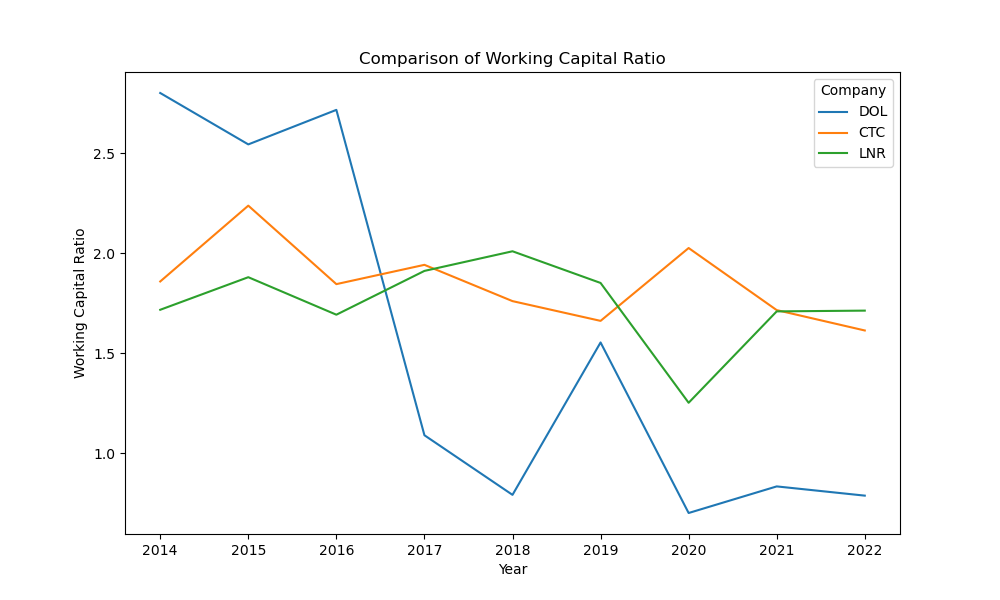

In [46]:
# comparison of Working Capital Ratio
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])

# Filter data for the Working Capital Ratio across the three companies
filtered_df = combined_df[["Ticker", "index", "Working capital ratio"]]

# Plotting the comparison of Working Capital Ratio
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Working capital ratio', hue='Ticker', data=filtered_df)
plt.title('Comparison of Working Capital Ratio')
plt.xlabel('Year')
plt.ylabel('Working Capital Ratio')
plt.legend(title='Company', loc='upper right')
plt.show()


<IPython.core.display.Javascript object>


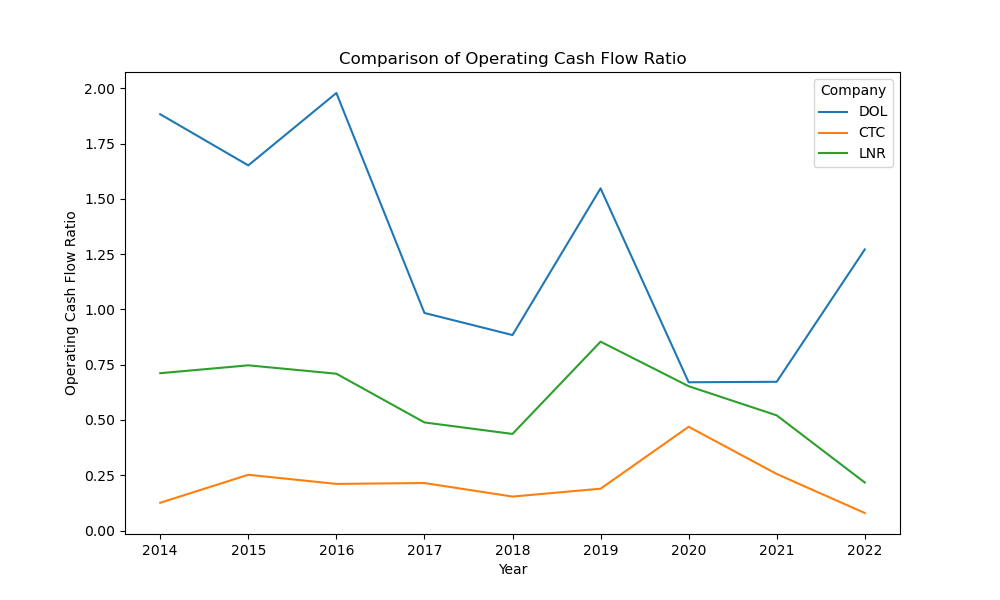

In [47]:
# Filter data for the Operating Cash Flow Ratio across the three companies
filtered_df = combined_df[["Ticker", "index", "Operating cash flow ratio"]]

# Plotting the comparison of Operating Cash Flow Ratio
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Operating cash flow ratio', hue='Ticker', data=filtered_df)
plt.title('Comparison of Operating Cash Flow Ratio')
plt.xlabel('Year')
plt.ylabel('Operating Cash Flow Ratio')
plt.legend(title='Company', loc='upper right')
plt.show()


<IPython.core.display.Javascript object>


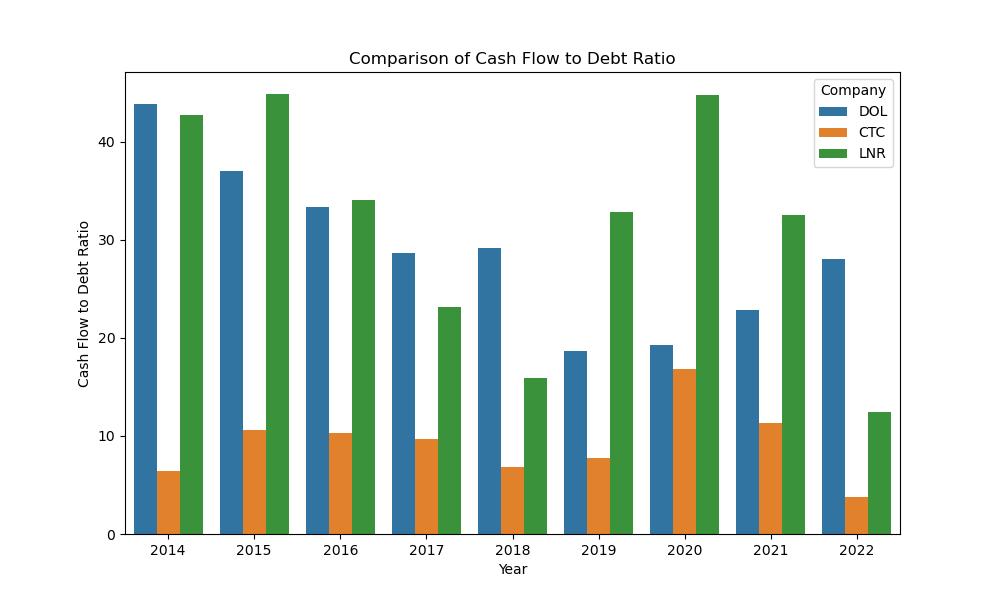

In [48]:
# Comparison of Cash Flow to Debt Ratio
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])


# Filter data for the Cash Flow to Debt Ratio across the three companies
filtered_df = combined_df[["Ticker", "index", "Cash flow to debt ratio"]]

# Plotting the comparison of Cash Flow to Debt Ratio
plt.figure(figsize=(10, 6))

sns.barplot(x='index', y='Cash flow to debt ratio', hue='Ticker', data=filtered_df)
plt.title('Comparison of Cash Flow to Debt Ratio')
plt.xlabel('Year')
plt.ylabel('Cash Flow to Debt Ratio')
plt.legend(title='Company', loc='upper right')
plt.show()


<IPython.core.display.Javascript object>


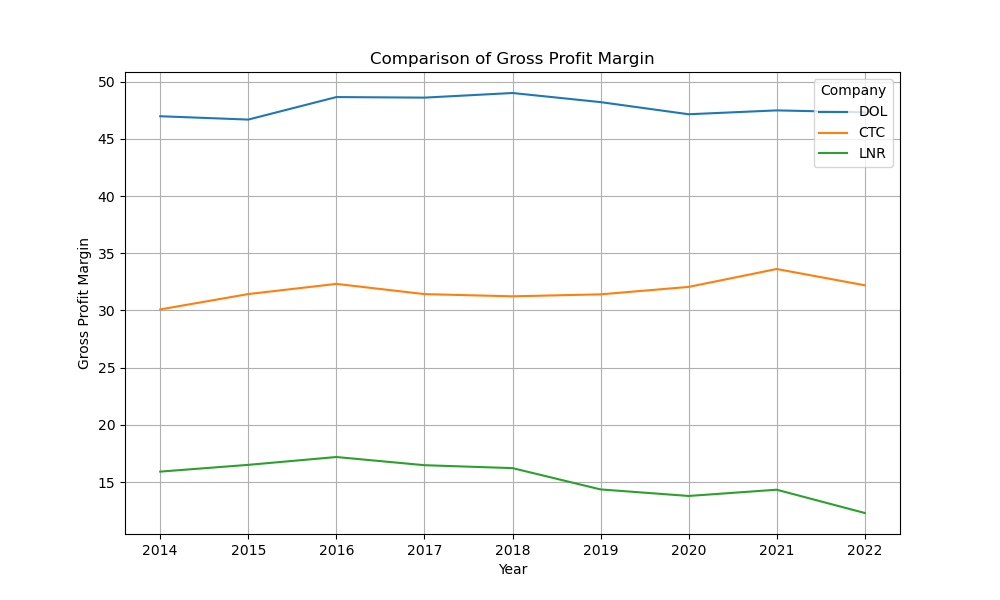

In [49]:
# Filter data for the Gross Profit Margin across the three companies
filtered_df = combined_df[["Ticker", "index", "Gross Progit Margin"]]

# Plotting the comparison of Gross Profit Margin
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Gross Progit Margin', hue='Ticker', data=filtered_df)
plt.title('Comparison of Gross Profit Margin')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Gross Profit Margin')
plt.legend(title='Company', loc='upper right')
plt.show()


<IPython.core.display.Javascript object>


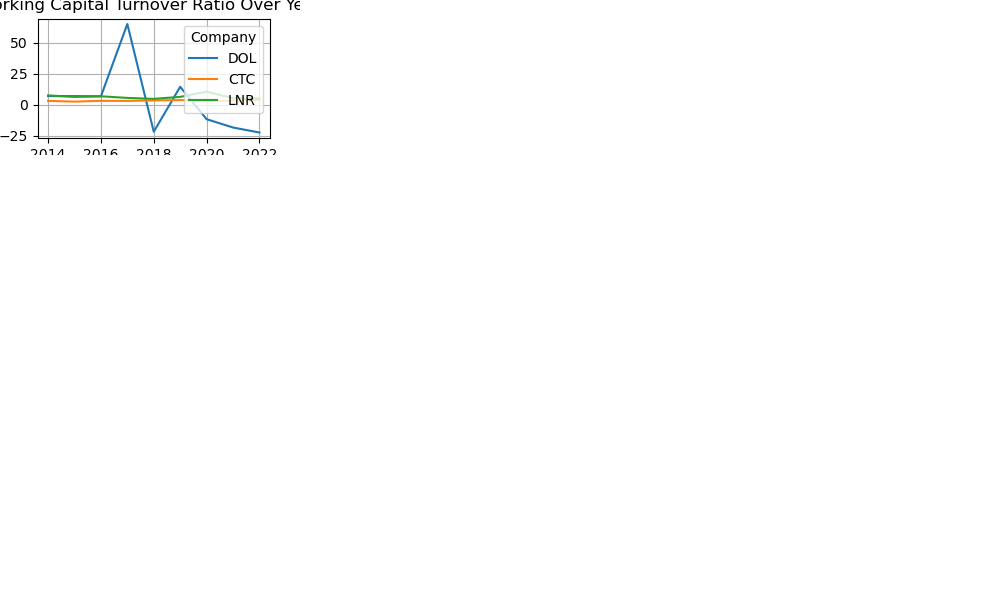

<IPython.core.display.Javascript object>


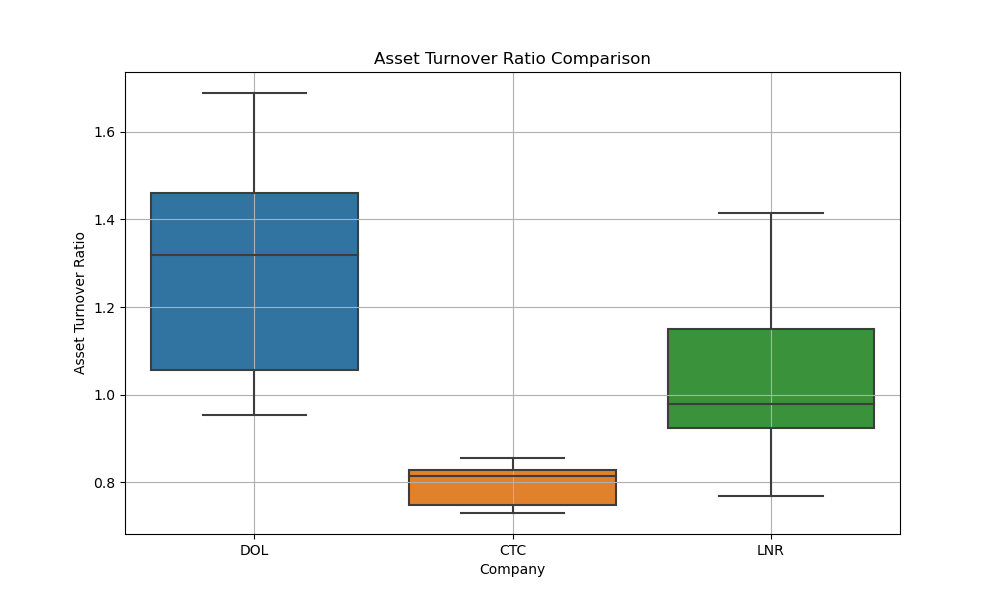

In [50]:
# Working Capital Turnover Ratio and Asset Turnover Ratio - Box Plot over years
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])


# Working Capital Turnover Ratio - Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Working capital turnover ratio', hue='Ticker', data=combined_df)
plt.title('Working Capital Turnover Ratio Over Years')
plt.xlabel('Year')
plt.ylabel('Working Capital Turnover Ratio')
plt.legend(title='Company')
plt.grid(True)
plt.show()

# Asset Turnover Ratio - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticker', y='Asset Turnover Ratio', data=combined_df)
# or sns.violinplot(x='Ticker', y='Asset Turnover Ratio', data=combined_df)
plt.title('Asset Turnover Ratio Comparison')
plt.xlabel('Company')
plt.ylabel('Asset Turnover Ratio')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


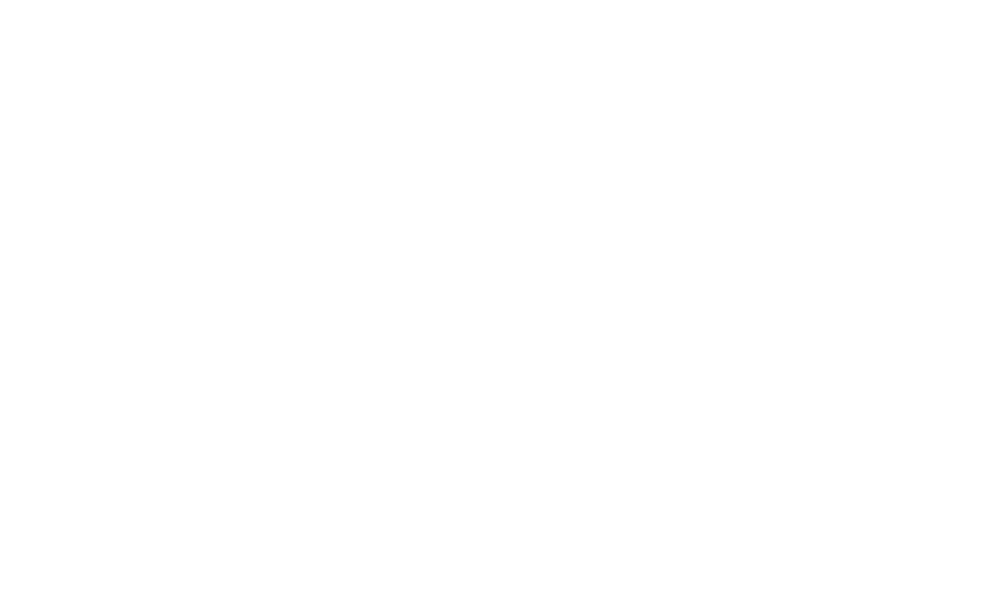

In [30]:
# Combine the data for 'Asset Turnover Ratio' and 'index' columns for all three companies
data_combined = pd.concat([Dollarama_ratios_df[['index', 'Asset Turnover Ratio']], 
                           Canadian_tire_ratios_df[['index', 'Asset Turnover Ratio']], 
                           Linamar_ratios_df[['index', 'Asset Turnover Ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in data_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Asset Turnover Ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in data_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Asset Turnover Ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Asset Turnover Ratio')
plt.title('Linear Regression Comparison for Asset Turnover Ratio')
plt.legend()
plt.grid(True)
plt.show()



<IPython.core.display.Javascript object>


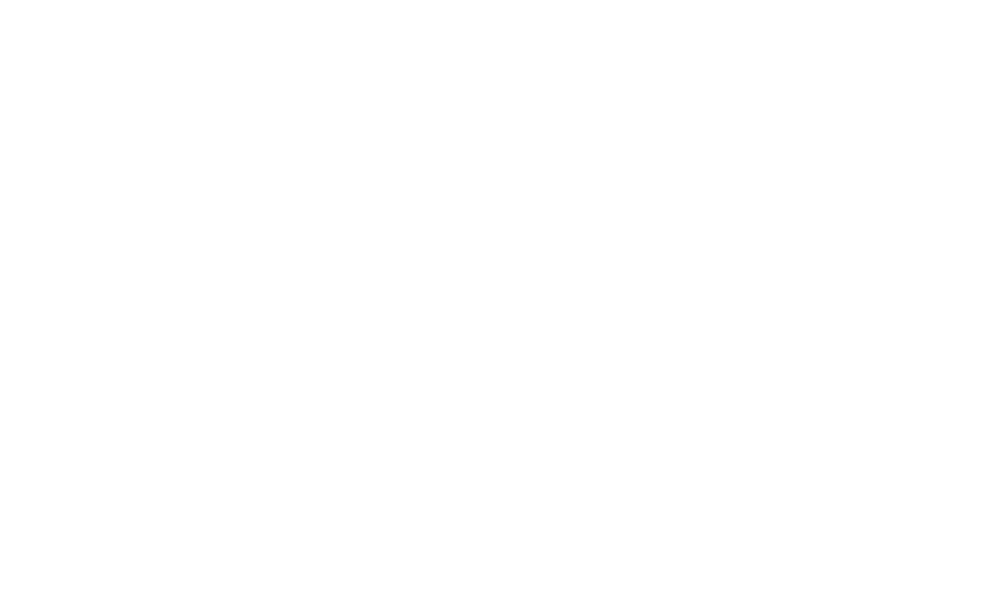

In [31]:
# Combine the data for 'Working Capital Ratio' and 'index' columns for all three companies
working_capital_combined = pd.concat([Dollarama_ratios_df[['index', 'Working capital ratio']], 
                                     Canadian_tire_ratios_df[['index', 'Working capital ratio']], 
                                     Linamar_ratios_df[['index', 'Working capital ratio']]], 
                                    keys=['Dollarama', 'Canadian Tire', 'Linamar'])  

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line for Working Capital Ratio
for company, company_data in working_capital_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Working capital ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in working_capital_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Working capital ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Working Capital Ratio')
plt.title('Linear Regression Comparison for Working Capital Ratio')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


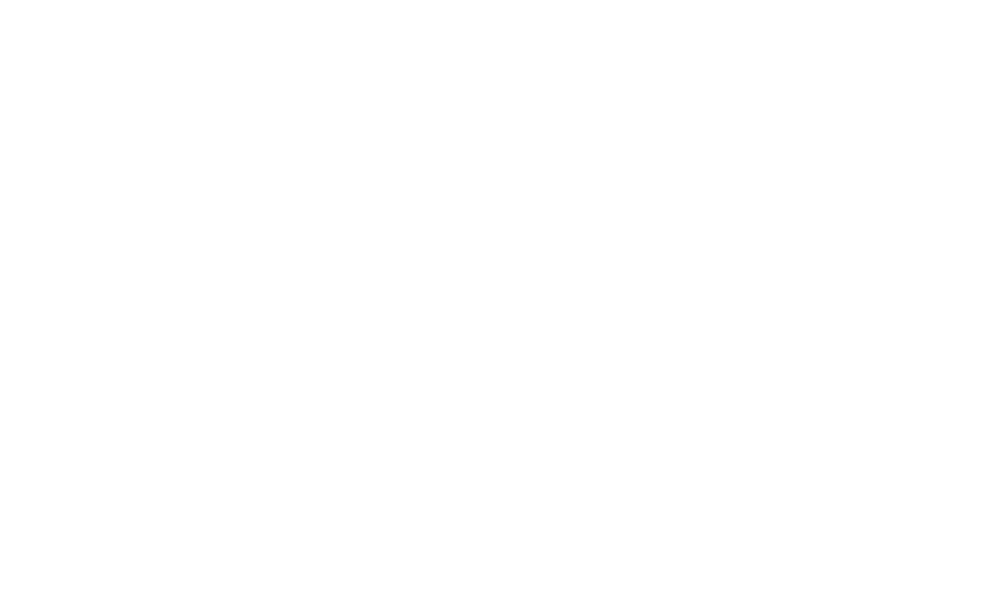

In [32]:
# Combine the data for 'Operating cash flow ratio', 'Debt to equity ratio', and 'index' columns for all three companies.

cash_flow_debt_combined = pd.concat([Dollarama_ratios_df[['index', 'Operating cash flow ratio', 'Debt to equity ratio']], 
                                     Canadian_tire_ratios_df[['index', 'Operating cash flow ratio', 'Debt to equity ratio']], 
                                     Linamar_ratios_df[['index', 'Operating cash flow ratio', 'Debt to equity ratio']]], 
                                    keys=['Dollarama', 'Canadian Tire', 'Linamar'])  

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line for Cash Flow to Debt Ratio
for company, company_data in cash_flow_debt_combined.groupby(level=0):
    X = company_data['Operating cash flow ratio'].values.reshape(-1, 1)
    Y = company_data['Debt to equity ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in cash_flow_debt_combined.groupby(level=0):
    plt.scatter(company_data['Operating cash flow ratio'], company_data['Debt to equity ratio'], label=company, marker='o')

plt.xlabel('Operating Cash Flow Ratio')
plt.ylabel('Debt to Equity Ratio')
plt.title('Linear Regression Comparison for Cash Flow to Debt Ratio')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


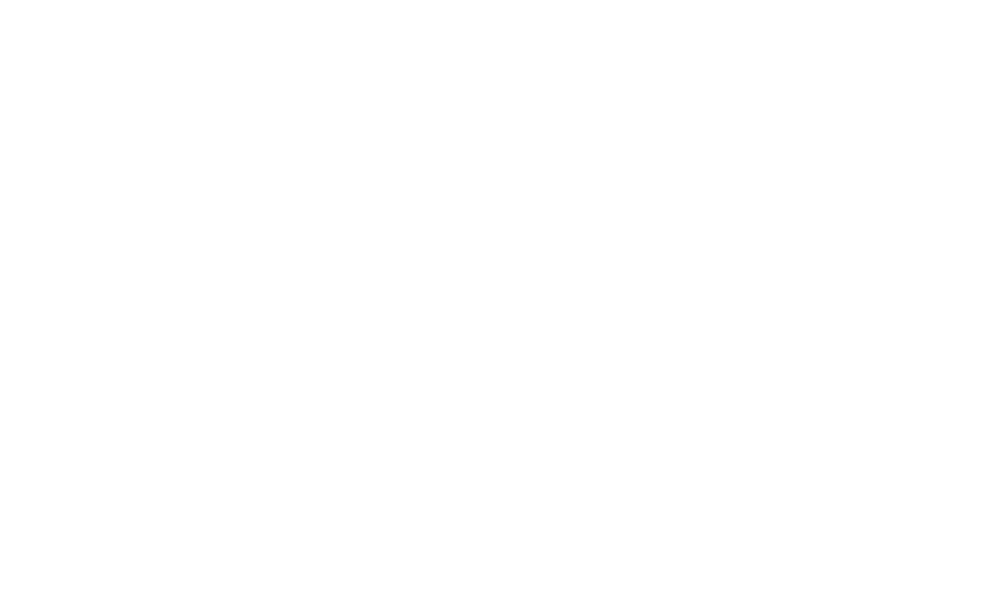

In [33]:
# Combine the data for 'Operating cash flow ratio' and 'index' columns for all three companies
cash_flow_combined = pd.concat([Dollarama_ratios_df[['index', 'Operating cash flow ratio']], 
                                     Canadian_tire_ratios_df[['index', 'Operating cash flow ratio']], 
                                     Linamar_ratios_df[['index', 'Operating cash flow ratio']]], 
                                    keys=['Dollarama', 'Canadian Tire', 'Linamar'])  

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line for Working Capital Ratio
for company, company_data in cash_flow_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Operating cash flow ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in cash_flow_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Operating cash flow ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Operating cash flow ratio')
plt.title('Linear Regression Comparison for Operating cash flow ratio')
plt.legend()
plt.grid(True)
plt.show()



# Calculating linear regression

In [34]:
# LinearRegression for Dollarama - Operating cash flow ratio

# Replace the below data with actual dataframes
data_dol = Dollarama_ratios_df
data_ctc = Canadian_tire_ratios_df
data_lnr = Linamar_ratios_df


# using Dol data
X_dol = data_dol[['index']]  # 'index' represents the years
Y_dol = data_dol['Operating cash flow ratio'] 

# Create a linear regression model
model_dol = LinearRegression()

# Fit the model
model_dol.fit(X_dol, Y_dol)

# Print the coefficients
print(f"Dol Coefficient: {model_dol.coef_[0]}")
print(f"Dol Intercept: {model_dol.intercept_}")


Dol Coefficient: -0.1239198000078284
Dol Intercept: 251.35269169630297


In [35]:
# LinearRegression for Canadian_tire - Operating cash flow ratio

# Replace the below data with actual dataframes
data_dol = Dollarama_ratios_df

# using Dol data
X_ctc = data_ctc[['index']]  
Y_ctc = data_ctc['Operating cash flow ratio'] 

# Create a linear regression model
model_ctc = LinearRegression()

# Fit the model
model_ctc.fit(X_ctc, Y_ctc)

# Print the coefficients
print(f"CTC Coefficient: {model_ctc.coef_[0]}")
print(f"CTC Intercept: {model_ctc.intercept_}")

CTC Coefficient: 0.005284982948972823
CTC Intercept: -10.448456335708245


In [36]:
# LinearRegression for Linamar - Operating cash flow ratio

# Replace the below data with actual dataframes
data_dol = Dollarama_ratios_df
data_ctc = Canadian_tire_ratios_df
data_lnr = Linamar_ratios_df


# using ctc data
X_lnr = data_lnr[['index']]  
Y_lnr = data_lnr['Operating cash flow ratio'] 

# Create a linear regression model
model_lnr = LinearRegression()

# Fit the model
model_lnr.fit(X_lnr, Y_lnr)

# Print the coefficients
print(f"LNR Coefficient: {model_lnr.coef_[0]}")
print(f"LNR Intercept: {model_lnr.intercept_}")

LNR Coefficient: -0.04007240653494643
LNR Intercept: 81.45923243518985


# Downloading data from Yahoo finance

In [37]:
data = yf.download("DOL.TO CTC.TO LNR.TO", start="2014-12-31", end="2022-12-31")
data.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                             Close             \
                CTC.TO     DOL.TO     LNR.TO      CTC.TO     DOL.TO   
Date                                                                  
2014-12-31  199.416946  19.159731  65.302574  231.000000  19.799999   
2015-01-02  195.100586  19.121025  64.557037  226.000000  19.760000   
2015-01-05  208.049713  19.191980  64.096848  241.000000  19.833332   
2015-01-06  207.013794  19.001421  61.151550  239.800003  19.610001   
2015-01-07  192.510712  18.830235  63.912762  223.000000  19.433332   

                             High                          Low             \
               LNR.TO      CTC.TO     DOL.TO     LNR.TO CTC.TO     DOL.TO   
Date                                                                        
2014-12-31  70.949997  231.000000  19.879999  71.790001  231.0  19.753332   
2015-01-02  70.139999  226.000000  19.940001  71.510002  226.0  19.616667   
2015-01-05  69.639999  241.000000  20.066668  70.290001  241.0  19.706667   
2015-01-06  66.440002  239.990005  19.996668  69.070000  230.0  19.436666   
2015-01-07  69.440002  223.000000  19.700001  69.980003  223.0  19.340000   

                             Open                       Volume                  
               LNR.TO      CTC.TO     DOL.TO     LNR.TO CTC.TO  DOL.TO  LNR.TO  
Date                                                                            
2014-12-31  70.650002  231.000000  19.756666  71.540001      0  278100   41100  
2015-01-02  69.650002  226.000000  19.799999  70.910004      0  325200   90700  
2015-01-05  69.050003  241.000000  19.756666  69.940002    200  932700  129200  
2015-01-06  65.620003  239.990005  19.866667  68.849998    500  795600  124200  
2015-01-07  67.000000  223.000000  19.700001  67.000000    500  988800  127800

In [38]:
data

Adj Close                             Close             \
                CTC.TO     DOL.TO     LNR.TO      CTC.TO     DOL.TO   
Date                                                                  
2014-12-31  199.416946  19.159731  65.302574  231.000000  19.799999   
2015-01-02  195.100586  19.121025  64.557037  226.000000  19.760000   
2015-01-05  208.049713  19.191980  64.096848  241.000000  19.833332   
2015-01-06  207.013794  19.001421  61.151550  239.800003  19.610001   
2015-01-07  192.510712  18.830235  63.912762  223.000000  19.433332   
...                ...        ...        ...         ...        ...   
2022-12-22  268.507355  79.792427  58.985378  275.000000  79.980003   
2022-12-23  258.743439  79.812378  59.202343  265.000000  80.000000   
2022-12-28  263.615631  80.650406  59.281239  269.989990  80.839996   
2022-12-29  244.087830  79.752518  60.839455  249.990005  79.940002   
2022-12-30  244.087830  79.004280  60.454830  249.990005  79.190002   

                             High                               Low  \
               LNR.TO      CTC.TO     DOL.TO     LNR.TO      CTC.TO   
Date                                                                  
2014-12-31  70.949997  231.000000  19.879999  71.790001  231.000000   
2015-01-02  70.139999  226.000000  19.940001  71.510002  226.000000   
2015-01-05  69.639999  241.000000  20.066668  70.290001  241.000000   
2015-01-06  66.440002  239.990005  19.996668  69.070000  230.000000   
2015-01-07  69.440002  223.000000  19.700001  69.980003  223.000000   
...               ...         ...        ...        ...         ...   
2022-12-22  59.810001  275.000000  80.360001  61.619999  275.000000   
2022-12-23  60.029999  265.000000  80.040001  60.980000  265.000000   
2022-12-28  60.110001  269.989990  81.500000  60.529999  269.989990   
2022-12-29  61.689999  249.990005  81.290001  62.189999  249.990005   
2022-12-30  61.299999  249.990005  80.000000  61.630001  249.990005   

                                        Open                       Volume  \
               DOL.TO     LNR.TO      CTC.TO     DOL.TO     LNR.TO CTC.TO   
Date                                                                        
2014-12-31  19.753332  70.650002  231.000000  19.756666  71.540001      0   
2015-01-02  19.616667  69.650002  226.000000  19.799999  70.910004      0   
2015-01-05  19.706667  69.050003  241.000000  19.756666  69.940002    200   
2015-01-06  19.436666  65.620003  239.990005  19.866667  68.849998    500   
2015-01-07  19.340000  67.000000  223.000000  19.700001  67.000000    500   
...               ...        ...         ...        ...        ...    ...   
2022-12-22  79.190002  58.000000  275.000000  80.040001  61.459999    100   
2022-12-23  79.000000  59.849998  265.000000  79.849998  60.090000    200   
2022-12-28  79.059998  59.650002  269.989990  79.059998  59.750000    200   
2022-12-29  79.860001  60.700001  249.990005  81.000000  60.700001    200   
2022-12-30  78.800003  60.770000  249.990005  79.709999  61.290001      0   

                            
            DOL.TO  LNR.TO  
Date                        
2014-12-31  278100   41100  
2015-01-02  325200   90700  
2015-01-05  932700  129200  
2015-01-06  795600  124200  
2015-01-07  988800  127800  
...            ...     ...  
2022-12-22  354000  156600  
2022-12-23  205800  107200  
2022-12-28  509200  109700  
2022-12-29  326100  100000  
2022-12-30  691400   61100  

[2008 rows x 18 columns]

In [39]:
df = data.drop(['Open','High','Low','Volume','Adj Close'],axis=1)
df

df_reset = df.reset_index()

df_close = df_reset[df_reset['Date'].isin(["2014-12-31", "2015-12-31", "2016-12-30", "2017-12-20", "2018-12-20" , 
                                           "2019-12-31" , "2020-12-31" , "2021-12-31" , "2022-12-30"])]

df_close.set_index('Date', inplace=True)

df_close

Close                      
                CTC.TO     DOL.TO     LNR.TO
Date                                        
2014-12-31  231.000000  19.799999  70.949997
2015-12-31  200.000000  26.646667  74.730003
2016-12-30  196.899994  32.793331  57.689999
2017-12-20  231.110001  52.036667  75.820000
2018-12-20  217.419998  31.750000  45.540001
2019-12-31  176.250000  44.630001  49.130001
2020-12-31  208.000000  51.880001  67.419998
2021-12-31  342.230011  63.310001  74.930000
2022-12-30  249.990005  79.190002  61.299999

In [40]:
# Converting DataFrame with a DateTimeIndex:
df_close.index = df_close.index.strftime('%Y-%m-%d')

# Rename the index
df_close = df_close.rename(index={
    "2014-12-31": "2014",
    "2015-12-31": "2015",
    "2016-12-30": "2016",
    "2017-12-20": "2017",
    "2018-12-20": "2018",
    "2019-12-31": "2019",
    "2020-12-31": "2020",
    "2021-12-31": "2021",
    "2022-12-30": "2022"
})


df_close

Close                      
          CTC.TO     DOL.TO     LNR.TO
Date                                  
2014  231.000000  19.799999  70.949997
2015  200.000000  26.646667  74.730003
2016  196.899994  32.793331  57.689999
2017  231.110001  52.036667  75.820000
2018  217.419998  31.750000  45.540001
2019  176.250000  44.630001  49.130001
2020  208.000000  51.880001  67.419998
2021  342.230011  63.310001  74.930000
2022  249.990005  79.190002  61.299999

# Correlation matrix

In [41]:
# calculating the correlation for Dollarama.
dollar_corr_df = pd.DataFrame(Dollarama_income_statement_df["Net Income to Stockholders"])

df_corr = pd.concat([dollar_corr_df["Net Income to Stockholders"] , df_close['Close', 'DOL.TO']] , axis = 1)

corr_dollarama_df = df_corr.drop(df_corr.index[9]).reset_index(drop=False)

corr_dollarama_df.corr(method='pearson', min_periods=9, numeric_only=False)


,index,Net Income to Stockholders,"(Close, DOL.TO)"
index,1.000000,0.972872,0.907466
Net Income to Stockholders,0.972872,1.000000,0.859791
"(Close, DOL.TO)",0.907466,0.859791,1.000000


In [42]:
# calculating the correlation for Canadian tire.
ctc_corr_df = pd.DataFrame(Canadian_tire_income_statement_df["Net Income to Stockholders"])

df_corr = pd.concat([ctc_corr_df["Net Income to Stockholders"] , df_close['Close', 'CTC.TO']] , axis = 1)

corr_ctc_df = df_corr.drop(df_corr.index[0]).reset_index(drop=False)

corr_ctc_df.corr(method='pearson', min_periods=9, numeric_only=False)

,index,Net Income to Stockholders,"(Close, CTC.TO)"
index,1.000000,0.856253,0.446193
Net Income to Stockholders,0.856253,1.000000,0.769737
"(Close, CTC.TO)",0.446193,0.769737,1.000000


In [43]:
# calculating the correlation for Linamar.
linamar_corr_df = pd.DataFrame(Linamar_income_statement_df["Net Income to Stockholders"])

df_corr = pd.concat([linamar_corr_df["Net Income to Stockholders"] , df_close['Close', 'LNR.TO']] , axis = 1)

corr_linamar_df = df_corr.drop(df_corr.index[0]).reset_index(drop=False)
corr_linamar_df.corr(method='pearson', min_periods=9, numeric_only=False)

,index,Net Income to Stockholders,"(Close, LNR.TO)"
index,1.00000,-0.103740,-0.180800
Net Income to Stockholders,-0.10374,1.000000,-0.374603
"(Close, LNR.TO)",-0.18080,-0.374603,1.000000


# Comparison of EPS and stock market prices

<IPython.core.display.Javascript object>


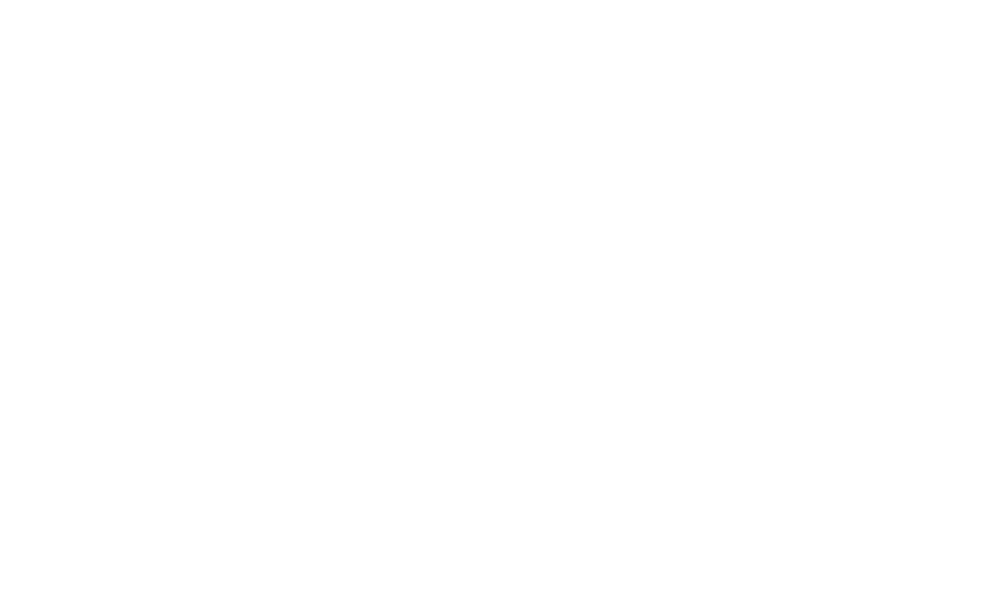

NameError: name 'ABC_prices' is not defined

In [44]:
# code for the EPS comparison
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])
filtered_df = combined_df[["Ticker", "index", "EPS"]]

plt.figure(figsize=(10, 6))

plt.subplot(121)  
sns.lineplot(x='index', y='EPS', hue='Ticker', data=filtered_df)
plt.title('Comparison of EPS')
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('EPS')
plt.legend(title='Company', loc='upper left')

# code for the heatmap
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
DOL_prices = [231.000000, 210.000000, 196.380005, 229.009995, 211.100006, 176.250000, 206.000000, 270.000000, 269.820007]
CTC_prices = [19.799999, 30.456667, 34.093334, 46.943333, 32.470001, 44.630001, 51.389999, 56.840000, 78.989998]
LNR_prices = [70.949997, 74.709999, 54.580002, 78.980003, 45.299999, 49.130001, 46.959999, 69.029999, 56.150002]

data_matrix = np.array([DOL_prices, ABC_prices, XYZ_prices])

plt.subplot(122)  # Creating the second subplot for the heatmap
plt.imshow(data_matrix, cmap='PRGn', aspect='auto')
plt.xticks(ticks=np.arange(len(years)), labels=years)
plt.yticks(ticks=np.arange(3), labels=['DOL.TO', 'CTC.TO', 'LNR.TO'])
plt.colorbar(label='Close Market Price')
plt.title('Heatmap of Close Market Prices')
plt.xlabel('Year')
plt.ylabel('Company')

plt.tight_layout() 
plt.show()


In [ ]:
# Net Profit Margin data for each company
dollarama_EPS = Dollarama_ratios_df.set_index('index')['EPS']
canadian_tire_EPS = Canadian_tire_ratios_df.set_index('index')['EPS']
linamar_EPS = Linamar_ratios_df.set_index('index')['EPS']

# Stock price data for each company
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
DOL_prices = [231.000000, 210.000000, 196.380005, 229.009995, 211.100006, 176.250000, 206.000000, 270.000000, 269.820007]
ABC_prices = [19.799999, 30.456667, 34.093334, 46.943333, 32.470001, 44.630001, 51.389999, 56.840000, 78.989998]
XYZ_prices = [70.949997, 74.709999, 54.580002, 78.980003, 45.299999, 49.130001, 46.959999, 69.029999, 56.150002]

# Plotting side-by-side line charts for Net Profit Margin and Stock Prices
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting EPS on the primary y-axis (left)
ax1.plot(dollarama_EPS.index, dollarama_EPS, label='Dollarama EPS', color='blue')
ax1.plot(canadian_tire_EPS.index, canadian_tire_EPS, label='Canadian Tire EPS', color='green')
ax1.plot(linamar_EPS.index, linamar_EPS, label='Linamar EPS', color='red')

ax1.set_xlabel('Year')
ax1.set_ylabel('Net Profit Margin', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Creating a secondary y-axis (right) for stock prices
ax2 = ax1.twinx()
ax2.plot(years, DOL_prices, label='Dollarama Stock Price', linestyle='--', marker='o', color='blue')
ax2.plot(years, ABC_prices, label='Canadian Tire Stock Price', linestyle='--', marker='o', color='green')
ax2.plot(years, XYZ_prices, label='Linamar Stock Price', linestyle='--', marker='o', color='red')

ax2.set_ylabel('Stock Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper center')

plt.title('Comparison of EPS and Stock Market Prices')
plt.grid(True)
plt.show()

